<h1 style="text-align: center;line-height: 0px;" markdown="1"> <span style="color:#fd5c63;font-size:30px"> Where will a new guest book their first &#9992; travel experience?</span> </h1> 
<h2 style="text-align: center;line-height: 15px;" markdown="1"> <span style="color:#9f9fa3">**Team Member:** Xinyi Hou, Aoran Zhang, Danyang Chen </span></h3>


In [29]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [30]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<a id='contents'></a>

<h1> <span style="color:#fd5c63;"> &#9992; Contents </span> </h1> 

<ul style = "list-style-type:none;line-height:1.6;">
  <li style="font-size:20px"> &#10063; <a href = '#Introduction'><span style = "color:#6f6f6f;">Introduction</span> </a>
      <ul style = "list-style-type:none"> 
          <li style="color:#6f6f6f;font-size:20px">&#10063; Datasets </li>
          <li style="color:#6f6f6f;font-size:20px">&#10063; Tools and Packages used </li>
      </ul></li> 
  <li style="font-size:20px"> &#10063; <a href = '#EDA'><span style = "color:#6f6f6f;">Exploratory Data Analysis</span> </a> 
      <ul style = "list-style-type:none"> 
          <li style="color:#6f6f6f;font-size:20px"> &#10063; Missing Variables </li>
          <li style="color:#6f6f6f;font-size:20px"> &#10063; Destination Country Distribution </li>
          <li style="color:#6f6f6f;font-size:20px"> &#10063; Gender </li>
          <li style="color:#6f6f6f;font-size:20px"> &#10063; Age </li>
          <li style="color:#6f6f6f;font-size:20px"> &#10063; Signup Method </li>
          <li style="color:#6f6f6f;font-size:20px"> &#10063; Account Create Month </li>
          <li style="color:#6f6f6f;font-size:20px"> &#10063; Sessions Related </li>
      </ul></li> 
  <li style="font-size:20px"> &#10063; <a href = '#FE'><span style = "color:#6f6f6f;">Feature Engineering</span> </a></li>
  <li style="font-size:20px"> &#10063; <a href = '#MS'><span style = "color:#6f6f6f;">Machine Learning Models</span> </a>
      <ul style = "list-style-type:none"> 
          <li style="color:#6f6f6f;font-size:20px"> &#10063; SVM </li>
          <li style="color:#6f6f6f;font-size:20px"> &#10063; Random Forest </li>
          <li style="color:#6f6f6f;font-size:20px"> &#10063; Xgboost </li>
          <li style="color:#6f6f6f;font-size:20px"> &#10063; Ensemble </li>
      </ul>
 </li>
  <li style="font-size:20px"> &#10063;  <a href = '#Conclusion'><span style = "color:#6f6f6f;">Conclusion</span> </a> </li>
  <li style="font-size:20px"> &#10063;  <a href = '#Reference'><span style = "color:#6f6f6f;">Reference</span> </a> </li>
</ul>



In [24]:
import os
import numpy as np
import pandas as pd
import pickle
from datetime import datetime, date
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.tools as tls
import plotly.plotly as py
import plotly.graph_objs as go 
from matplotlib_venn import venn3, venn3_circles
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
tls.set_credentials_file(username='danielle91515', api_key='bNFnux0jxNwO9rsAJX17')

%matplotlib inline
plt.style.use('ggplot')

<a id='Introduction'></a>

<h1> <span style="color:#fd5c63;line-height: 0px;">&#9992; Introduction </span> </h1>

<p style="font-size:18px; line-height: 25px;font-family:Arial;color:#6f6f6f"> In this project, we use an Airbnb new users booking dataset to predict the users’ country destination. The dataset come from a previous [Kaggle competition](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data Airbnb). Airbnb enables people to lease or rent short-term lodging including vacation rentals, apartment rentals, homestays, hostel beds, or hotel rooms. Since 2008, Airbnb has 3,000,000 lodging listings in 65,000 cities and 191 countries, serving more than 60 million users. Analyzing new online user behavior is valuable for generating user specific recommendations, improving the booking success rate and customer retention rate. In this project, we will use the user session data provided by Airbnb to predict user's booking destination. There are 11 unique destination counties in the dataset. We will use user's profile information (such as gender, age, account created date etc) and user's session data (such as action, action type, etc) to classify the destination country.</p>

<h3> <span style="color:#fd5c63;line-height: 0px;">&#10063; Datasets </span> </h3>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> There are 3 important datasets provided by Airbnb: training, test and session datasets. In the training dataset, there are <span style="color:#fd5c63;">213451 </span>unique user ids; In the test dataset, there are <span style="color:#fd5c63;">62096</span> unique user ids; In thie sessions dataset, there are <span style="color:#fd5c63;">135484</span> unique user ids; 71815 (34.58%) users in the training datasets have data in the session; 61668 (99.31%) users in the test datasets have data in the session. You can see it from the Venn diagram shown below. There are no duplicated IDs in test and training datasets. The labels for the testing data is unknown. The performance of the model on test dataset can only be assessed through kaggle scoring metrics. For our learning purpose, we decide to <span style="color:#fd5c63;">use training dataset only</span> in this project.</p>

In [12]:
train_users_path='train_users_2.csv'
test_users_path='test_users.csv'
sessions_path='sessions.csv'

df_train = pd.read_csv(train_users_path) # Load training datasets
target = df_train['country_destination'] # Save training labels
df_test = pd.read_csv(test_users_path)   # Load testing datasets
df_sessions = pd.read_csv(sessions_path) 
df_sessions['id'] = df_sessions['user_id'] # Change user_id to id
df_sessions = df_sessions.drop(['user_id'],axis=1)

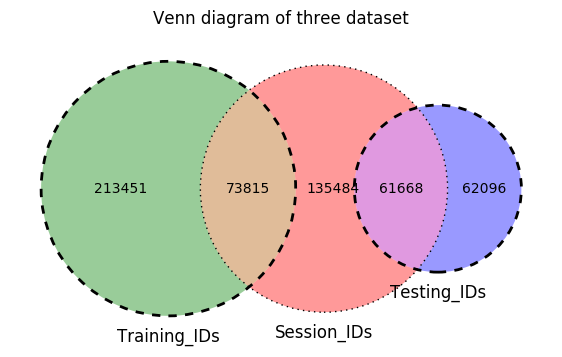

In [17]:
sessions_id = Counter(df_sessions["id"]).keys()
plt.figure(figsize = (7,7))
# Abc, aBc, ABc, abC, AbC, aBC, ABC
v = venn3(subsets=(len(sessions_id), len(Counter(df_train["id"])), len(pd.Series(list(set(df_train["id"]).intersection(set(sessions_id))))), len(Counter(df_test["id"])), len(pd.Series(list(set(df_test["id"]).intersection(set(sessions_id))))), len(pd.Series(list(set(df_train["id"]).intersection(set(df_test["id"]))))), 0), set_labels = ('Session_IDs', 'Training_IDs', 'Testing_IDs'))
c = venn3_circles(subsets=(len(sessions_id), len(Counter(df_train["id"])), len(pd.Series(list(set(df_train["id"]).intersection(set(sessions_id))))), len(Counter(df_test["id"])), len(pd.Series(list(set(df_test["id"]).intersection(set(sessions_id))))), len(pd.Series(list(set(df_train["id"]).intersection(set(df_test["id"]))))), 0), linestyle='dashed')
c[0].set_lw(1.0)
c[0].set_ls('dotted')
plt.title("Venn diagram of three dataset")

plt.show()

<h3> <span style="color:#fd5c63;line-height: 0px;">&#10063; Tools and Packages used </span> </h3>


<table style="color:#6f6f6f;white-space:nowrap;font-size:18px;" align="center" >
  <tr>
    <th>Packages</th>
    <th>Description</th> 
  </tr>
  <tr>
    <td>pandas, numpy</td>
    <td>Data Munging</td> 
  </tr>
  <tr>
    <td>sklearn</td>
    <td>Machine Learning</td> 
  </tr>
  <tr>
    <td>matplotlib, Seaborn, Plotly</td>
    <td>Visualization</td> 
  </tr>
</table>

<a href = '#contents'><span style = "color:#6f6f6f;font-size:14px;color:#6f6f6f"> Return to contents &#8682; </span> </a>

<a id='EDA'></a>

<h1> <span style="color:#fd5c63;line-height: 0px;">&#9992; Exploratory Data Analysis </span> </h1>

In [102]:
df_train = pd.read_csv(train_users_path)
df_train = df_train.drop(['date_first_booking'], axis=1)

df_sessions = pd.read_csv(sessions_path)
df_sessions['id'] = df_sessions['user_id']
df_sessions = df_sessions.drop(['user_id'],axis=1)

users_train_insession = pd.Series(list(set(df_train["id"]).intersection(set(df_sessions['id']))))
all_data = df_train[df_train['id'].isin(list(users_train_insession))]

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> There are 73815 users in both session and training datasets. Now, let us explore the data of these 73815 users data!</p>

<h3> <span style="color:#fd5c63;line-height: 0px;">&#10063; Missing Variables</span> </h3>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> A lots of values are recorded as --unknown--. Let we replace them with NaN. A lot of users gender, age and first_browser are missing. We will impulate it later in the feature engineering part. </p>

In [100]:
#Number of missing values of every column
all_data = all_data.replace('-unknown-', np.nan)
all_data.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
gender                     37788
age                        32248
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked      302
signup_app                     0
first_device_type              0
first_browser              12271
dtype: int64

<h3> <span style="color:#fd5c63;line-height: 0px;">&#10063; Destination Country Distribution</span> </h3>

In [103]:
#Percentage of each destination
all_data['country_destination'].value_counts()/len(all_data)

NDF      0.610188
US       0.272235
other    0.049516
FR       0.019440
IT       0.013263
GB       0.009903
ES       0.009578
CA       0.005961
DE       0.003387
NL       0.003346
AU       0.002059
PT       0.001124
Name: country_destination, dtype: float64

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> Most of the users did not book, thus they are marked as NDF(None Destination Found). NDF and US are two dominant categories. The Y distribution is super imbalanced. </p>


<h3> <span style="color:#fd5c63;line-height: 0px;">&#10063; Gender</span> </h3>

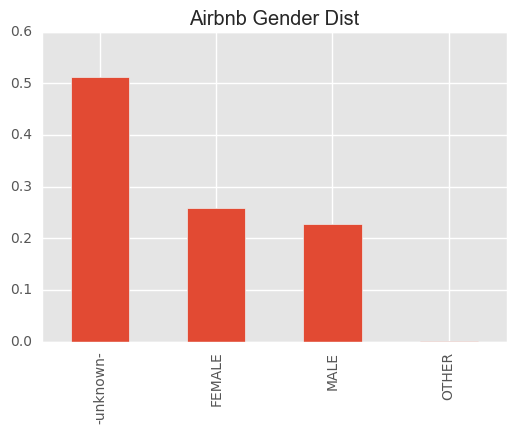

In [104]:
gender_percentage = all_data.gender.value_counts(dropna=False)/len(all_data)
gender_percentage.plot(kind='bar')
plt.title('Airbnb Gender Dist')

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> Well balnaced between male and female with female slightly more.</p>

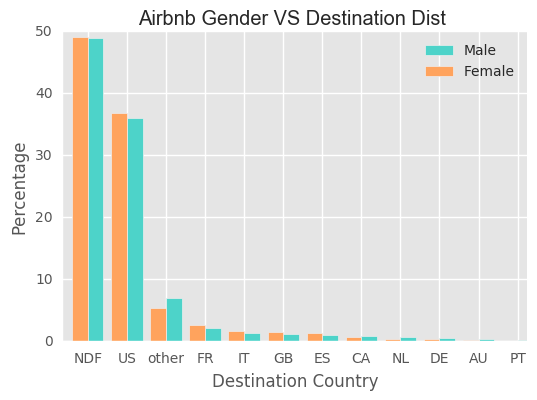

In [105]:
women = sum(all_data['gender'] == 'FEMALE')
men = sum(all_data['gender'] == 'MALE')

female_destinations = all_data.loc[all_data['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = all_data.loc[all_data['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.4

male_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
plt.title('Airbnb Gender VS Destination Dist ')

sns.despine()
plt.show()

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> We do not find significant difference between two genders for each destination.</p>

<h3> <span style="color:#fd5c63;line-height: 0px;">&#10063; Age</span> </h3>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> For the age, there are some extreme values. For example, 2 of them are less than 10 and 721 of them are greater than 100 years old. When we draw the age distribution plot, we would omit them. Most of the users are below 40 years old.</p>

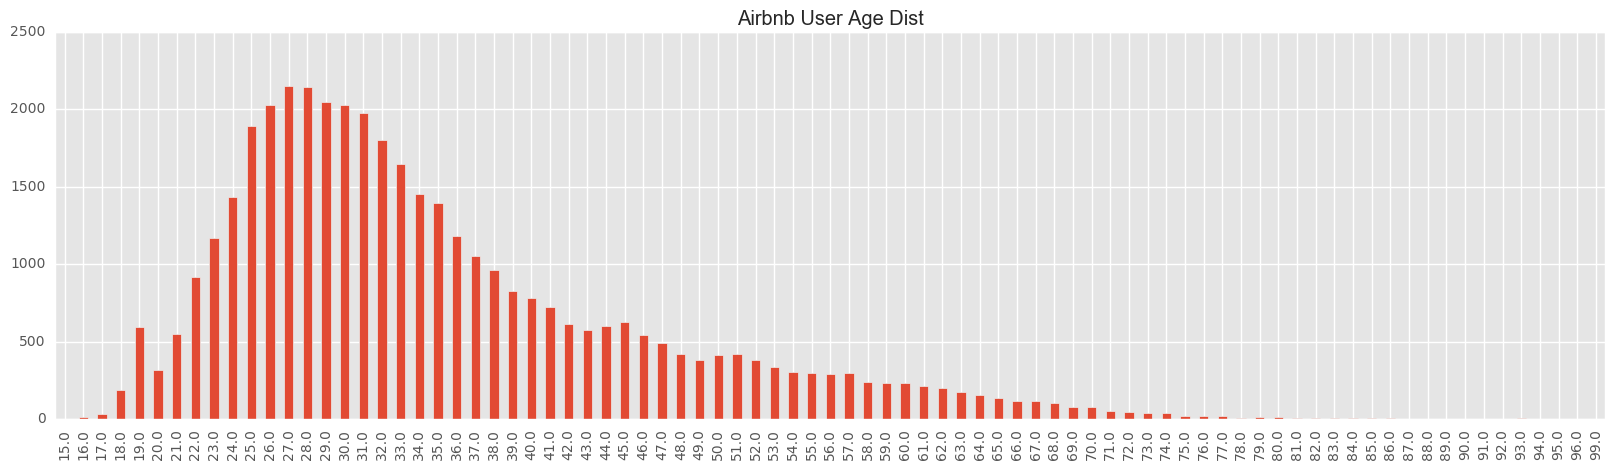

In [107]:
upr = all_data.age < 100 
lwr = all_data.age > 10
plt.figure(figsize=(20, 5))
age_percentage = all_data.age[lwr & upr].value_counts()
age_percentage.sort_index().plot(kind='bar')
plt.title('Airbnb User Age Dist')
#Majority of users in their late twenties - early thirties

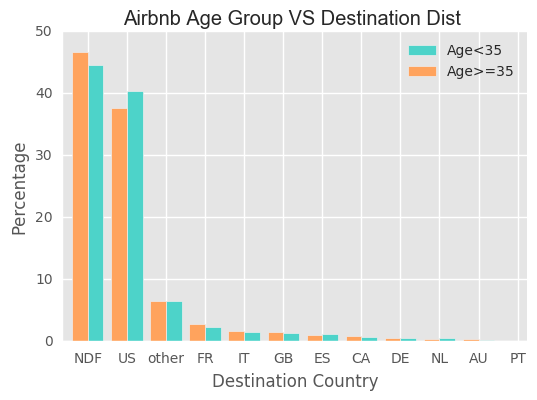

In [108]:
younger = sum(all_data['age'] <35)
older = sum(all_data['age'] >=35)

young_destinations = all_data.loc[all_data['age'] <35, 'country_destination'].value_counts() /younger * 100
old_destinations = all_data.loc[all_data['age'] >=35, 'country_destination'].value_counts() / older * 100

# Bar width
width = 0.4

young_destinations.plot(kind='bar', width=width,  position=0, label='Age<35', rot=0,color='#4DD3C9')
old_destinations.plot(kind='bar', width=width,  position=1, label='Age>=35', rot=0,color='#FFA35D')

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
plt.title('Airbnb Age Group VS Destination Dist ')

sns.despine()
plt.show()

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> For US, young people prefer to book US houses compared with older group. However, the difference is not very obvious. </p>

<h3> <span style="color:#fd5c63;line-height: 0px;">&#10063; Sign Up Method</span> </h3>

In [110]:
#Signup_method
Counter(all_data.signup_method)

Counter({'basic': 55135, 'facebook': 18136, 'google': 544})

/anaconda/envs/141b/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



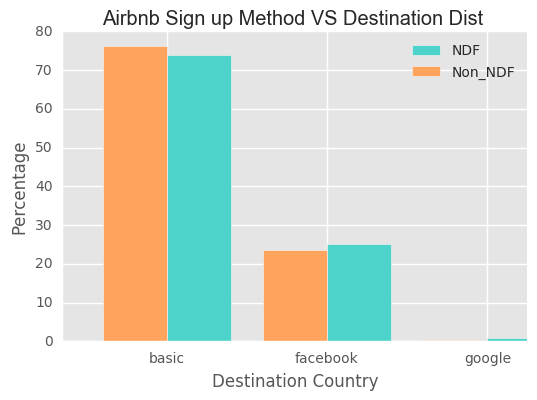

In [111]:
all_data['NDF'] = pd.Series(all_data.country_destination=='NDF')
n_ndf = sum(all_data['NDF'])
n_non_ndf=len(all_data)-sum(all_data['NDF'])

ndf_destinations = all_data.loc[all_data.NDF, 'signup_method'].value_counts() /n_ndf * 100
non_ndf_destinations = all_data.loc[~all_data.NDF, 'signup_method'].value_counts() / n_non_ndf * 100

# Bar width
width = 0.4

ndf_destinations.plot(kind='bar', width=width,  position=0, label='NDF', rot=0,color='#4DD3C9')
non_ndf_destinations.plot(kind='bar', width=width,  position=1, label='Non_NDF', rot=0,color='#FFA35D')

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
plt.title('Airbnb Sign up Method VS Destination Dist ')

sns.despine()
plt.show()

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> The users use basic sign up method has a little bit higher probability to book the houses. The below shows a list of affilate providers. </p>

In [113]:
#Affilate provider
Counter(all_data.affiliate_provider).most_common()

[('direct', 46814),
 ('google', 21604),
 ('other', 3315),
 ('bing', 862),
 ('facebook', 664),
 ('padmapper', 166),
 ('email-marketing', 93),
 ('yahoo', 92),
 ('facebook-open-graph', 89),
 ('gsp', 32),
 ('vast', 29),
 ('naver', 19),
 ('baidu', 13),
 ('yandex', 13),
 ('meetup', 7),
 ('craigslist', 2),
 ('daum', 1)]

In [114]:
#Signup_app
print("The signup app is ")
Counter(all_data.signup_app).most_common()

The signup app is 


[('Web', 57016), ('iOS', 10410), ('Android', 3779), ('Moweb', 2610)]

<h3> <span style="color:#fd5c63;line-height: 0px;">&#10063; Account Create Month</span> </h3>

/anaconda/envs/141b/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda/envs/141b/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda/envs/141b/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

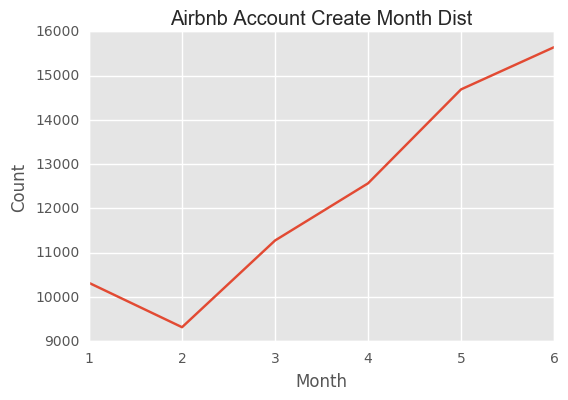

In [122]:
all_data['date_account_created'] = pd.to_datetime(all_data['date_account_created'])
month = []
year = []
for date in all_data.date_account_created:
    month.append(date.month)
    year.append(date.year)
all_data["month"] = month
all_data["year"] = year

month_count = all_data["month"].value_counts()
month_count.sort_index().plot()
plt.title('Airbnb Account Create Month Dist')
plt.xlabel('Month')
plt.ylabel('Count')

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> The number of new accounts keep growing and we do not find obvious seasonal pattern, although there is a littble drop down from Jan to Feb. </p>

<h3> <span style="color:#fd5c63;line-height: 0px;">&#10063; Sessions Related</span> </h3>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> There are 332 values for action. The most common 10 are shown below. </p>

In [124]:
Counter(df_sessions.action).most_common(10)

[('show', 2768278),
 ('index', 843699),
 ('search_results', 725226),
 ('personalize', 706824),
 ('search', 536057),
 ('ajax_refresh_subtotal', 487744),
 ('update', 365130),
 ('similar_listings', 364624),
 ('social_connections', 339000),
 ('reviews', 320591)]

In [125]:
print("The most common action type is")
#Action type
Counter(df_sessions.action_type).most_common()

The most common action type is


[('view', 3560902),
 ('data', 2103770),
 ('click', 1996183),
 (nan, 1126204),
 ('-unknown-', 1031170),
 ('submit', 623357),
 ('message_post', 87103),
 ('partner_callback', 19132),
 ('booking_request', 18773),
 ('modify', 1139),
 ('booking_response', 4)]

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> There are 129 values for action details. The most common 10 are shown below. </p>

In [126]:
Counter(df_sessions.action_detail).most_common(10)

[('view_search_results', 1776885),
 ('p3', 1376550),
 (nan, 1126204),
 ('-unknown-', 1031141),
 ('wishlist_content_update', 706824),
 ('user_profile', 656839),
 ('change_trip_characteristics', 487744),
 ('similar_listings', 364624),
 ('user_social_connections', 336799),
 ('update_listing', 269779)]

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> We need to clean the nan and -unknown- data later. </p>

<a href = '#contents'><span style = "color:#6f6f6f;font-size:14px;color:#6f6f6f"> Return to contents &#8682; </span> </a>

<a id='FE'></a>

<h1> <span style="color:#fd5c63;line-height: 0px;">&#9992; Feature Engineering </span> </h1>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> In the feature engineering part, not only training dataset but also testing dataset is used. From our previous exploratory data analysis, age of more than 50% users are missing. Therefore, we will use the age and gender distributions provided by Airbnb to imputate those missing values. Since the age distribution includes users in the training and testing datasets, it is necessary for us to use both. And also, the processed testing dataset in this project can be used in the future if we want to explore more after this class.</p>

<h3> <span style="color:#fd5c63;line-height: 0px;">&#10063; Session Dataset </span> </h3>
<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> In this session dataset, it has 6 variables, including user id, action (lookup, search results etc), action type (the way they execute that action), action detail(what exactly they lookup, are they viewing results or editing etc), device type (what device they use when they do this action) and secs elapsed (the time they stay in this session). Every time, when users logged in to their account and make actions, their informaiton were recorded. Therefore, each user has more than 1 record. For example, the table shows below.  </p>


In [25]:
df_sessions.head()

,action,action_type,action_detail,device_type,secs_elapsed,id
0,lookup,NaN,NaN,Windows Desktop,319.0,d1mm9tcy42
1,search_results,click,view_search_results,Windows Desktop,67753.0,d1mm9tcy42
2,lookup,NaN,NaN,Windows Desktop,301.0,d1mm9tcy42
3,search_results,click,view_search_results,Windows Desktop,22141.0,d1mm9tcy42
4,lookup,NaN,NaN,Windows Desktop,435.0,d1mm9tcy42


<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> In this dataset, there are 365 action values. We group by the action and count each action's frequency. The average number of count is 29214. We decide to change <span style="color:#fd5c63;">action values with less than 100 frequency to 'OTHER'.</span> The resulted dataset has 230 action values.  </p>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> In order to merge with training dataset, we need to genearate one record for each user id. Therefore, an important step in this feature engineering is to extract useful statistics from session data and create a new dataset which includes one row for each user.</p>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> First, we group by user's id and check the number of actions he/she has done. And then, we are transforming the action, action_type, action_detail, device_type, and section elapsed variables from <span style="color:#fd5c63;"> long to wide format </span>.</p>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> Now, we are taking action as a example to show how the transformation process works. First, we sort the action values based on their count descendingly. Action Show has 2768278 rows. It is ranked as the first and its index is 230. You can check the details below. These action values are transformed as the panda dataframe column. Therefore, we transform the dataset from long to wide form. Instead of having one column to show action, we have 231 columns now. The rank index plus one is its column name. Therefore, columns c_1 to c_231 are the one-hot-encoding columns for action. Afte that, columns c_232 to c_234 are the number of unique actions this user did, the mean count of these actions and the standard deviation. </p>



In [28]:
df_sessions.action = df_sessions.action.fillna('NAN')
df_sessions.action_type = df_sessions.action_type.fillna('NAN')
df_sessions.action_detail = df_sessions.action_detail.fillna('NAN')
df_sessions.device_type = df_sessions.device_type.fillna('NAN')

# Action values with low frequency are changed to 'OTHER'
act_freq = 100  #Threshold for frequency
act = dict(zip(*np.unique(df_sessions.action, return_counts=True)))
df_sessions.action = df_sessions.action.apply(lambda x: 'OTHER' if act[x] < act_freq else x)

#
f_act = df_sessions.action.value_counts().argsort() # descending
f_act

show                                       230
index                                      229
search_results                             227
personalize                                228
search                                     226
ajax_refresh_subtotal                      225
update                                     224
similar_listings                           223
social_connections                         222
reviews                                    221
active                                     220
similar_listings_v2                        219
lookup                                     218
create                                     217
dashboard                                  216
header_userpic                             215
collections                                214
edit                                       213
campaigns                                  212
track_page_view                            211
NAN                                        210
unavailabilit

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f">After transformation, here is a list of columns decriptions and an example of the dataframe.  </p>

<ul style = "font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f">
  <li><span style="color:#fd5c63;">c_1 to c_234</span>: 231 unique action values + # of unique action values for each user + (mean + std) of the count</li>
  <li><span style="color:#fd5c63;">c_235 to c_393</span>: 156 unique action detail values + # of unique action detail + mean + std</li>
  <li><span style="color:#fd5c63;">c_394 to c_407</span>: 11 unique action types + # of unique action type + mean + std</li>
  <li><span style="color:#fd5c63;">c_408 to c_418</span>: (1 + log of sum of elapsed time) for each of the 11 unique action types </li>
  <li><span style="color:#fd5c63;">c_419 to c_436</span>: 14 device types + # of unique device type + mean + std</li>
  <li><span style="color:#fd5c63;">c_437 to c_456</span>: sections elapsed sum + mean + std + median + total mean + 15 time intervals count </li>
</ul>  

In [34]:
#Computing value_counts. These are going to be used in the one-hot encoding
#based feature generation (following loop).
f_act = df_sessions.action.value_counts().argsort() # descending
f_act_detail = df_sessions.action_detail.value_counts().argsort() # descending
f_act_type = df_sessions.action_type.value_counts().argsort() # descending
f_dev_type = df_sessions.device_type.value_counts().argsort() # descending

# grouping session by id. We will compute features from all rows with the same id.
dgr_sess = df_sessions.groupby(['id'])
# Loop on dgr_sess to create all the features.
# This is about 10 minutes
samples = []
cont = 0
ln = len(dgr_sess)
for g in dgr_sess:
    if cont%10000 == 0:
        print("%s from %s" %(cont, ln))
    gr = g[1]
    l = []
    
    #the id, the key in groupby list
    l.append(g[0]) ##### l has the id #####
    
    #The actual first feature is the number of values. the number of actions for each users
    l.append(len(gr)) ##### l has id + the number of actions in this user #####
    
    sev = gr.secs_elapsed.fillna(0).values   # These values are used later. # these are the values secs_elapsed are known
    
    #action features
    #(how many times each value occurs, numb of unique values, mean and std)
    c_act = [0] * len(f_act) # create a list has the length of unique actions for each user
    for i,v in enumerate(gr.action.values):
        c_act[f_act[v]] += 1 # this is the user action list and has each action's count
                             # It is the reverse order of f_act
                             # In f_act, the order is show, index ....
                             # In c_act, the order is .......... index, show
    _, c_act_uqc = np.unique(gr.action.values, return_counts=True)
    c_act += [len(c_act_uqc), np.mean(c_act_uqc), np.std(c_act_uqc)]
    l = l + c_act ##### l now have 'id + number of actions in this user + 
                        # list of all actions and their count + leng of unique actions + 
                        # mean frequenc + std freq" #####
    
    #action_detail features
    #(how many times each value occurs, numb of unique values, mean and std)
    c_act_detail = [0] * len(f_act_detail)
    for i,v in enumerate(gr.action_detail.values):
        c_act_detail[f_act_detail[v]] += 1 
    _, c_act_det_uqc = np.unique(gr.action_detail.values, return_counts=True)
    c_act_detail += [len(c_act_det_uqc), np.mean(c_act_det_uqc), np.std(c_act_det_uqc)]
    l = l + c_act_detail ##### l now have 'id + number of actions in this user + 
                            # action features + action_detail features#####
    
    #action_type features
    #(how many times each value occurs, numb of unique values, mean and std
    #+ log of the sum of secs_elapsed for each value)
    l_act_type = [0] * len(f_act_type)
    c_act_type = [0] * len(f_act_type)
    for i,v in enumerate(gr.action_type.values):
        l_act_type[f_act_type[v]] += sev[i]   
        c_act_type[f_act_type[v]] += 1  
    l_act_type = np.log(1 + np.array(l_act_type)).tolist()
    _, c_act_type_uqc = np.unique(gr.action_type.values, return_counts=True)
    c_act_type += [len(c_act_type_uqc), np.mean(c_act_type_uqc), np.std(c_act_type_uqc)]
    l = l + c_act_type + l_act_type  ##### l now have 'id + number of actions in this user + 
                            # action features + action_detail features + action type + action type elapse#####  
    
    #device_type features
    #(how many times each value occurs, numb of unique values, mean and std)
    c_dev_type  = [0] * len(f_dev_type)
    for i,v in enumerate(gr.device_type .values):
        c_dev_type[f_dev_type[v]] += 1 
    c_dev_type.append(len(np.unique(gr.device_type.values)))
    _, c_dev_type_uqc = np.unique(gr.device_type.values, return_counts=True)
    c_dev_type += [len(c_dev_type_uqc), np.mean(c_dev_type_uqc), np.std(c_dev_type_uqc)]        
    l = l + c_dev_type    ##### l now have 'id + number of actions in this user + 
                            # action features + action_detail features + action type + action type elapse
                            # + device type #####  
    
    #secs_elapsed features        
    l_secs = [0] * 5 
    l_log = [0] * 15
    if len(sev) > 0:
        #Simple statistics about the secs_elapsed values.
        l_secs[0] = np.log(1 + np.sum(sev))
        l_secs[1] = np.log(1 + np.mean(sev)) 
        l_secs[2] = np.log(1 + np.std(sev))
        l_secs[3] = np.log(1 + np.median(sev))
        l_secs[4] = l_secs[0] / float(l[1])
        
        #Values are grouped in 15 intervals. Compute the number of values
        #in each interval.
        log_sev = np.log(1 + sev).astype(int)
        l_log = np.bincount(log_sev, minlength=15).tolist()                      
    l = l + l_secs + l_log 
     ##### l now have 'id + number of actions in this user + 
        # action features + action_detail features + action type + action type elapse
        # + device type + secs_elapsed simple statistiics + distribution#####  
    
    
    #The list l has the feature values of one sample.
    samples.append(l)
    cont += 1

#Creating a dataframe with the computed features    
col_names = []    #name of the columns
for i in range(len(samples[0])-1):
    col_names.append('c_' + str(i)) 
#preparing objects    
samples = np.array(samples)
samp_ar = samples[:, 1:].astype(np.float16)
samp_id = samples[:, 0]   #The first element in obs is the id of the sample.

#creating the dataframe        
df_agg_sess = pd.DataFrame(samp_ar, columns=col_names)
df_agg_sess['id'] = samp_id
df_agg_sess.index = df_agg_sess.id

df_agg_sess.head()

,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,...,c_448,c_449,c_450,c_451,c_452,c_453,c_454,c_455,c_456,id
id,,,,,,,,,,,,,,,,,,,,,
00023iyk9l,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,6.0,2.0,3.0,3.0,1.0,0.0,1.0,0.0,00023iyk9l
0010k6l0om,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,12.0,2.0,8.0,4.0,3.0,0.0,0.0,0.0,0010k6l0om
001wyh0pz8,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,30.0,9.0,8.0,1.0,0.0,0.0,0.0,0.0,001wyh0pz8
0028jgx1x1,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,3.0,5.0,4.0,1.0,0.0,0.0,0.0,0028jgx1x1
002qnbzfs5,789.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,111.0,102.0,104.0,57.0,28.0,9.0,4.0,1.0,1.0,002qnbzfs5


<h3> <span style="color:#fd5c63;line-height: 0px;"> &#10063; Train + Test Dataset </span> </h3>

<h4> <span style="color:#fd5c63;line-height: 0px;"> &#10063; Inpute Missing Values </span> </h4>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> After dropping the destination variable in the training dataset, we combine the train and test set. There are 275547 records. Within them, 116866 users' age are missing. 6085 first_affilate_tracked is missing. We also take a look at the NaN or NAN values. In order to process the dataset easily, <span style="color:#fd5c63;"> we replace all missing or unknown values with -1</span>. After this step, we can see that the variables which contains missing values are gender, age, language, first_affiliate_tracked, and first_brower.</p> 

In [50]:
#df_train = df_train.drop(['country_destination'], axis=1)
df_tt = pd.concat((df_train, df_test), axis=0, ignore_index=True)
df_tt.index = df_tt.id

########Creating features for train+test
#Removing date_first_booking
df_tt = df_tt.drop(['date_first_booking'], axis=1)
df_tt.isnull().sum()

df_tt = df_tt.fillna(-1)  #Inputing this kind of missing value with -1 (missing values in train and test)
df_tt = df_tt.replace('-unknown-', -1) #-unknown is another way of missing value, then = -1.

#Number of nulls
df_tt['n_null'] = np.array([sum(r == -1) for r in df_tt.values])

for col in df_tt:
    print (col, sum(df_tt[col]==-1))

('id', 0)
('date_account_created', 0)
('timestamp_first_active', 0)
('gender', 129480)
('age', 116866)
('signup_method', 0)
('signup_flow', 0)
('language', 1)
('affiliate_channel', 0)
('affiliate_provider', 0)
('first_affiliate_tracked', 6085)
('signup_app', 0)
('first_device_type', 0)
('first_browser', 44394)
('n_null', 0)


<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> For <span style="color:#fd5c63;">gender</span>, there are 47% missing values. It is difficult to impute gender. The only way we can do is to random guess. Therefore, we decide to leave gender like this. </p>

In [53]:
Counter(df_tt.gender)

Counter({-1: 129480, 'FEMALE': 77524, 'MALE': 68209, 'OTHER': 334})

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> For <span style="color:#fd5c63;">age</span>, if the age is between 14 to 99, we think it is reasonable. Otherwise, if the age is between 1900 to 2000, the user may mistakenly input their birth year into the age. Therefore, we substract that year from 2014. If the age is between 0 and 14, we decide to use 14 as their age. If the age is between 2010 to 2016, the user probably input the current year. Then, we decide to use -1 as their age. </p>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> After that, we find may people aged at 105. It is very strange. Therefore, we set those people's age to -1. For people who are aged above 99 and not equal to 105, their age are changed to be 99. There are 118966 people whose age are missing (equal to -1 in our case). The missing values are imputed based on the known age distribution. </p>

In [62]:
#Age
#(Keeping ages in 14 < age < 99 as OK and grouping others according different kinds of mistakes)
av = df_tt.age.values
av = np.where(np.logical_and(av<2000, av>1900), 2014-av, av) #This are birthdays instead of age (estimating age by doing 2014 - value)
av = np.where(np.logical_and(av<14, av>0), 14, av) #Using specific value=14 for age values below 14
av = np.where(np.logical_and(av<2016, av>2010), -1, av) #This is the current year insted of age (using specific value = -1)

av = np.where(av == 105, -1, av)  #A lot of ppl are 105, which is strange, set the value to be -1.
av = np.where(av > 99, 99, av)  #Using specific value=99 for age values above 99

av_pop = av[av>0]#Get non-missing the values of age
av[av == -1] = np.random.choice(av_pop,118966,replace = True)#For the missing data of age, interpolate it according to the sample age distribution
df_tt['age'] = av

In [63]:
Counter(df_tt.age.values)

Counter({14.0: 95,
         15.0: 16,
         16.0: 69,
         17.0: 128,
         18.0: 1470,
         19.0: 3530,
         20.0: 1617,
         21.0: 2780,
         22.0: 4399,
         23.0: 6166,
         24.0: 8062,
         25.0: 10821,
         26.0: 11948,
         27.0: 13061,
         28.0: 13456,
         29.0: 13400,
         30.0: 13698,
         31.0: 13324,
         32.0: 12710,
         33.0: 11981,
         34.0: 10650,
         35.0: 10539,
         36.0: 8858,
         37.0: 7876,
         38.0: 7215,
         39.0: 6451,
         40.0: 5853,
         41.0: 5475,
         42.0: 4834,
         43.0: 4360,
         44.0: 4528,
         45.0: 4643,
         46.0: 4054,
         47.0: 3540,
         48.0: 3087,
         49.0: 2830,
         50.0: 3033,
         51.0: 2822,
         52.0: 2596,
         53.0: 2371,
         54.0: 2176,
         55.0: 2206,
         56.0: 1990,
         57.0: 1955,
         58.0: 1719,
         59.0: 1683,
         60.0: 1534,
         

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> For <span style="color:#fd5c63;">language</span>, there is only one person's langauge is unknown. We decide to use english as his/her language since 96% users speak English. After replacing the language to 'en', the frequency list of language is shown below. </p>

In [57]:
df_tt[df_tt.language == -1]

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,n_null
id,,,,,,,,,,,,,,,
2a0p72u9mg,2a0p72u9mg,2014-08-26,20140826014036,-1,-1.0,basic,0,-1,direct,direct,untracked,Web,iPhone,Mobile Safari,3


In [58]:
df_tt = df_tt.set_value('2a0p72u9mg', 'language', 'en')
Counter(df_tt.language)

Counter({'ca': 6,
         'cs': 49,
         'da': 75,
         'de': 977,
         'el': 30,
         'en': 265539,
         'es': 1174,
         'fi': 20,
         'fr': 1508,
         'hr': 2,
         'hu': 25,
         'id': 23,
         'is': 5,
         'it': 633,
         'ja': 345,
         'ko': 1116,
         'nl': 134,
         'no': 51,
         'pl': 75,
         'pt': 322,
         'ru': 508,
         'sv': 176,
         'th': 28,
         'tr': 92,
         'zh': 2634})

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> For <span style="color:#fd5c63;">first_affiliate_tracked</span> variable, we decide to categorize all the <span style="color:#fd5c63;">unknown to untracked category</span>. The frequency list is shown below.</p>

In [59]:
#Replace all -1 with untracked
df_tt.first_affiliate_tracked = df_tt.first_affiliate_tracked.replace(-1, 'untracked')
Counter(df_tt.first_affiliate_tracked)

Counter({'linked': 62064,
         'local ops': 69,
         'marketing': 281,
         'omg': 54859,
         'product': 2353,
         'tracked-other': 6655,
         'untracked': 149266})

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> For <span style="color:#fd5c63;">first_brower</span> variable, we decide to first combine the values with low frequency (<100> to Other. Then, we decide to <span style="color:#fd5c63;">categorize all the unknown to other</span> as well. The frequency list is shown below.</p>

In [60]:
# first_browser values with low frequency are changed to 'OTHER'
freq = 100  #Threshold for frequency
browser = dict(zip(*np.unique(df_tt.first_browser, return_counts=True)))
df_tt.first_browser = df_tt.first_browser.apply(lambda x: 'OTHER' if browser[x] < freq else x)
#Replace -1 with Other
df_tt.first_browser = df_tt.first_browser.replace(-1, 'OTHER')
Counter(df_tt.first_browser)

Counter({'AOL Explorer': 254,
         'Android Browser': 1577,
         'Chrome': 78671,
         'Chrome Mobile': 3186,
         'Firefox': 38665,
         'IE': 24744,
         'IE Mobile': 118,
         'Mobile Safari': 29636,
         'OTHER': 44994,
         'Opera': 228,
         'Safari': 53302,
         'Silk': 172})

<h4> <span style="color:#fd5c63;line-height: 0px;"> &#10063; Other Feature Engineering </span> </h4>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> After that, we extract more information from user account created date. We find out the year, month, day and calculate in which week they create and on which weekday they create. The weekday information is coded using one-hot-encoding. The reason of doing one-hot-encoding is that many machine learning algorithems (such as linear models, svm, knn etc) cannot handle categorical data. There are two common ways to transform the categorical data. One is to factorize. The other one is to use one-hot-encoding. Factorizing does not help since it does not change the nature of the data. We just use a number to replace the character values. Also, it brings a problem since it imparts an ordinal property to the variable. As this is ordinal characteristic is usually not desired. However, using one-hot-encoding can proper representation of the distinct elements of the variable. It also make easy to fine tune the parameters.</p>

In [67]:
# date_account_created 
# (Computing year, month, day, week_number, weekday)
dac = np.vstack(df_tt.date_account_created.astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
df_tt['dac_y'] = dac[:,0]
df_tt['dac_m'] = dac[:,1]
df_tt['dac_d'] = dac[:,2]
dac_dates = [datetime(x[0],x[1],x[2]) for x in dac]
df_tt['dac_wn'] = np.array([d.isocalendar()[1] for d in dac_dates])
df_tt['dac_w'] = np.array([d.weekday() for d in dac_dates])

In [68]:
# dummy variables
df_tt_wd = pd.get_dummies(df_tt.dac_w, prefix='dac_w')
df_tt = df_tt.drop(['date_account_created', 'dac_w'], axis=1)
df_tt = pd.concat((df_tt, df_tt_wd), axis=1)

In [69]:
df_tt.head()

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,dac_m,dac_d,dac_wn,dac_w_0,dac_w_1,dac_w_2,dac_w_3,dac_w_4,dac_w_5,dac_w_6
id,,,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,gxn3p5htnn,20090319043255,-1,68.0,facebook,0,en,direct,direct,untracked,...,6,28,26,1,0,0,0,0,0,0
820tgsjxq7,820tgsjxq7,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,...,5,25,21,0,0,1,0,0,0,0
4ft3gnwmtx,4ft3gnwmtx,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,...,9,28,39,0,1,0,0,0,0,0
bjjt8pjhuk,bjjt8pjhuk,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,...,12,5,49,1,0,0,0,0,0,0
87mebub9p4,87mebub9p4,20091208061105,-1,41.0,basic,0,en,direct,direct,untracked,...,9,14,37,0,1,0,0,0,0,0


<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> Similar information is extracted from timestamp_first_active variable.</p>

In [70]:
#timestamp_first_active
#(Computing year, month, day, hour, week_number, weekday)
tfa = np.vstack(df_tt.timestamp_first_active.astype(str).apply(lambda x: list(map(int, [x[:4],x[4:6],x[6:8],x[8:10],x[10:12],x[12:14]]))).values)
df_tt['tfa_y'] = tfa[:,0]
df_tt['tfa_m'] = tfa[:,1]
df_tt['tfa_d'] = tfa[:,2]
df_tt['tfa_h'] = tfa[:,3]
tfa_dates = [datetime(x[0],x[1],x[2],x[3],x[4],x[5]) for x in tfa]
df_tt['tfa_wn'] = np.array([d.isocalendar()[1] for d in tfa_dates])
df_tt['tfa_w'] = np.array([d.weekday() for d in tfa_dates])
df_tt_wd = pd.get_dummies(df_tt.tfa_w, prefix='tfa_w')
df_tt = df_tt.drop(['timestamp_first_active', 'tfa_w'], axis=1)
df_tt = pd.concat((df_tt, df_tt_wd), axis=1)

In [72]:
df_tt.head()

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,...,tfa_d,tfa_h,tfa_wn,tfa_w_0,tfa_w_1,tfa_w_2,tfa_w_3,tfa_w_4,tfa_w_5,tfa_w_6
id,,,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,gxn3p5htnn,-1,68.0,facebook,0,en,direct,direct,untracked,Web,...,19,4,12,0,0,0,1,0,0,0
820tgsjxq7,820tgsjxq7,MALE,38.0,facebook,0,en,seo,google,untracked,Web,...,23,17,21,0,0,0,0,0,1,0
4ft3gnwmtx,4ft3gnwmtx,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,...,9,23,24,0,1,0,0,0,0,0
bjjt8pjhuk,bjjt8pjhuk,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,...,31,6,44,0,0,0,0,0,1,0
87mebub9p4,87mebub9p4,-1,41.0,basic,0,en,direct,direct,untracked,Web,...,8,6,50,0,1,0,0,0,0,0


<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> Also the time spans between the account created day and timestamp_first_active is calculated. The sign of this difference is recorded. The season of the account created and timestamp first active are also calculated. The are coded as 0 Winter, 1 Spring, 2 Summer, and 3 Autumn.  </p>

In [12]:
#timespans between dates: account created day and timestamp_first_active
#(Computing absolute number of seconds of difference between dates, sign of the difference)
df_tt['dac_tfa_secs'] = np.array([np.log(1+abs((dac_dates[i]-tfa_dates[i]).total_seconds())) for i in range(len(dac_dates))])
df_tt['sig_dac_tfa'] = np.array([np.sign((dac_dates[i]-tfa_dates[i]).total_seconds()) for i in range(len(dac_dates))])

In [74]:
#Comptute seasons from dates
#(Computing the season for the two dates)
Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [(0, (date(Y,  1,  1),  date(Y,  3, 20))),  #'winter'
           (1, (date(Y,  3, 21),  date(Y,  6, 20))),  #'spring'
           (2, (date(Y,  6, 21),  date(Y,  9, 22))),  #'summer'
           (3, (date(Y,  9, 23),  date(Y, 12, 20))),  #'autumn'
           (0, (date(Y, 12, 21),  date(Y, 12, 31)))]  #'winter'
def get_season(dt):
    dt = dt.date()
    dt = dt.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= dt <= end)
df_tt['season_dac'] = np.array([get_season(dt) for dt in dac_dates])
df_tt['season_tfa'] = np.array([get_season(dt) for dt in tfa_dates])

In [76]:
df_tt.head()

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,...,tfa_w_1,tfa_w_2,tfa_w_3,tfa_w_4,tfa_w_5,tfa_w_6,dac_tfa_secs,sig_dac_tfa,season_dac,season_tfa
id,,,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,gxn3p5htnn,-1,68.0,facebook,0,en,direct,direct,untracked,Web,...,0,0,1,0,0,0,17.510522,1.0,2,0
820tgsjxq7,820tgsjxq7,MALE,38.0,facebook,0,en,seo,google,untracked,Web,...,0,0,0,0,1,0,17.961510,1.0,1,1
4ft3gnwmtx,4ft3gnwmtx,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,...,1,0,0,0,0,0,17.530127,1.0,3,1
bjjt8pjhuk,bjjt8pjhuk,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,...,0,0,0,0,1,0,18.006291,1.0,3,3
87mebub9p4,87mebub9p4,-1,41.0,basic,0,en,direct,direct,untracked,Web,...,1,0,0,0,0,0,17.000612,1.0,2,3


<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f">The final step is to one-hot-encoding for age intervals and all the categorical variables such as gender, signup method etc. </p>

In [77]:
#AgeRange
#(One-hot encoding of the edge according these intervals)
interv =  [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 100]
def get_interv_value(age):
    iv = 20
    for i in range(len(interv)):
        if age < interv[i]:
            iv = i 
            break
    return iv
df_tt['age_interv'] = df_tt.age.apply(lambda x: get_interv_value(x))
df_tt_ai = pd.get_dummies(df_tt.age_interv, prefix='age_interv')
df_tt = df_tt.drop(['age_interv'], axis=1)
df_tt = pd.concat((df_tt, df_tt_ai), axis=1)

#One-hot-encoding features
ohe_feats = ['gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']
for f in ohe_feats:
    df_tt_dummy = pd.get_dummies(df_tt[f], prefix=f)
    df_tt = df_tt.drop([f], axis=1)
    df_tt = pd.concat((df_tt, df_tt_dummy), axis=1)  

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> Finally, the train dataset is joined with session dataset. And the test dataset is joined with session dataset as well. Since we only use the training dataset in this project, I split the training dataset. 20% training dataset is used as test set. The result is used as new training dataset. </p>

<h3> <span style="color:#fd5c63;line-height: 0px;"> &#10063; The datasets used in the machine learning modeling section are  </span> </h3>
<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> The train dataset contains 59052 users data. The test dataset contains 14763 users data. </p>

In [8]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv('y_train.csv',header=None)
y_test = pd.read_csv('y_test.csv',header=None)

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> The train dataset is shown below. </p>

In [83]:
X_train.head()

,age,n_null,dac_y,dac_m,dac_d,dac_wn,dac_w_0,dac_w_1,dac_w_2,dac_w_3,...,c_448,c_449,c_450,c_451,c_452,c_453,c_454,c_455,c_456,all_null
0,53.0,2,2014,2,7,6,0,0,0,0,...,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1
1,30.0,2,2014,3,17,12,1,0,0,0,...,6.0,12.0,4.0,5.0,2.0,1.0,0.0,0.0,0.0,1
2,40.0,3,2014,6,27,26,0,0,0,0,...,7.0,9.0,5.0,15.0,20.0,3.0,0.0,1.0,0.0,1
3,23.0,0,2014,5,2,18,0,0,0,0,...,7.0,4.0,3.0,18.0,6.0,2.0,3.0,0.0,1.0,1
4,19.0,1,2014,6,2,23,1,0,0,0,...,36.0,9.0,10.0,27.0,25.0,8.0,3.0,2.0,0.0,1


<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> The test dataset is shown below. </p>

In [85]:
X_test.head()

,age,n_null,dac_y,dac_m,dac_d,dac_wn,dac_w_0,dac_w_1,dac_w_2,dac_w_3,...,c_448,c_449,c_450,c_451,c_452,c_453,c_454,c_455,c_456,all_null
0,36.0,0,2014,5,8,19,0,0,0,1,...,111.0,65.0,55.0,61.0,34.0,10.0,1.0,3.0,0.0,1
1,40.0,1,2014,4,20,16,0,0,0,0,...,12.0,1.0,2.0,7.0,14.0,6.0,0.0,1.0,0.0,1
2,36.0,1,2014,5,17,20,0,0,0,0,...,12.0,11.0,4.0,2.0,7.0,4.0,4.0,0.0,0.0,1
3,29.0,0,2014,5,4,18,0,0,0,0,...,4.0,13.0,15.0,12.0,8.0,5.0,5.0,0.0,0.0,1
4,33.0,2,2014,6,18,25,0,0,1,0,...,15.0,13.0,12.0,5.0,9.0,2.0,1.0,0.0,0.0,1


<a href = '#contents'><span style = "color:#6f6f6f;font-size:14px;color:#6f6f6f"> Return to contents &#8682; </span> </a>

<a id='MS'></a>

<h1> <span style="color:#fd5c63;line-height: 0px;">&#9992; Machine Learning Models</span> </h1>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> </p>

<h3> <span style="color:#fd5c63;line-height: 0px;"> &#10063; SVM </span> </h3>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> The SVM (Support Vector Machine) is a well-known supervised learning models for both classification and regression. However, it is mostly used in classification problem and is effective in high dimensional spaces.We use the SVC function of sklearn and the default decision function shape is 'one_over_one' for the multiclassification problem. We try both of the linear and RBF kernel. We split the traning data into new training and testing set to tune the parameters. For the linear kernel SVM, we tune the parameter C and the best one is C=1. For the RBF kernel, we tune C and gamma. The best combination is <span style="color:#fd5c63;">C=1 and gamma=0.1</span>. To speed the algorithm, I use the MinMaxScaler function of sklearn to scale the data and apply PCA to do the demension reduction. In the end, we only keep 40 components. The highest accuracy of the linear kernel is 0.66842782632256315 when C=10. Compared with C=1, the accuracy just increases 0.01%, but the computing time is 4 times as before. To get a balance between the accuracy and computation time, we choose C=1 for the linear kernel SVM. For the RBF kernel, the highest accuracy is 0.6779109937 when C=1 and gamma=0.1. The running time of this RBF kernel(C=1,gamma=0.1) is three times of the linear kernel(C=1). For the final model, we only fit the linear kernel with C=1. </p>
<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f">You can check out more by this link [SVM Notebook](https://github.com/UCDSTA208/208-final-project-crazy/blob/master/SVM.ipynb)</p>

<h3> <span style="color:#fd5c63;line-height: 0px;"> &#10063; Random Forest </span> </h3>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> Random forests or random decision forests are an ensemble learning method for classification and regression that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests gives a robust result and avoid overfitting. </p>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f">In this model, we tuned two parameters number of trees and max deepth for each tree based on training data. We selected model based on the score for each model. According to 5 folds cross validation, the best model has <span style="color:#fd5c63;">400 trees and max depth as 13</span>. The score for this model is 0.68. Then, we apply this model to test data. The accuracy for prediction is 0.6862.</p>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f">You can check out more by this link [Random Forest Notebook](https://github.com/UCDSTA208/208-final-project-crazy/blob/master/stat%20208%20project.ipynb)</p>

<h3> <span style="color:#fd5c63;line-height: 0px;"> &#10063; eXtreme Gradient Boosting (XGBoost)</span> </h3>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> XGBoost (eXtreme Gradient Boosting) is  an advanced implementation of gradient boosting algorithm. It has great boosting capabilities by ensembling multiple trees together. The advantage of XGBoost includes (1) Regularization: Standard gradient boosting does not have regularization which leads to overfitting. XGBoost is known as 'regularized boosting'; (2)Parallel Processing: The node building and node spliting can be processed parallelly. This lands to an implementation on Hadoop; (3) Handling missing Value; (4) Tree Pruning: Gradient boosting stops pruning a tree when it has a negative loss. However, sometimes, a negative loss may have a positive gain next step. XGBoost optimizes this process. </p>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> At the start, the initial values of the parameters are set up in order to find out the best iteration. The initial values includes: max_depth = 5; learning_rate = 0.1; n_estimators = 10000; objective = multi:softprob (The result contains predicted probability of each data point belonging to each class); random_state = 1 (in case we want to repeat the process); eval_metric = mlogloss (multiclass negative log-likelihood). From this model, the best iteration is 111. For tuning boosting parameters, the learning rate = 0.1, n_estimators = 111, objective = multi:softprob, eval_metric = mlogloss are used. Booster parameters tuned in this models are shown below. The parameters are tuned based on the mlogloss metric and using 5 fold cross validation. </p>

<table align="right">
  <tr>
    <th>Parameters</th>
    <th>Descriptions</th> 
    <th>Values Tried</th>
    <th>Values Selected</th>
  </tr>
  <tr>
    <td>Max_depth</td>
    <td>the maximum depth of a tree; control over-fitting</td>
    <td>3, 5, 7, 9</td>
    <td>5</td>
  </tr>
  <tr>
    <td>Min_child_weight</td>
    <td>minimum sum of weights of all observations required in a child; control over-fitting</td>
    <td>1, 3, 5</td>
    <td>5</td>
  </tr>
  <tr>
    <td>Gamma</td>
    <td>the minimum loss reduction required to make a split</td>
    <td>0.0, 0.1, 0.2, 0.3, 0.4</td>
    <td>0.3</td>
  </tr>
  <tr>
    <td>Subsample</td>
    <td>the fraction of observations to be randomly samples for each tree</td>
    <td>0.6, 0.7, 0.8, 0.9</td>
    <td>0.8</td>
  </tr>
  <tr>
    <td>Colsample_bytree</td>
    <td>the fraction of columns to be randomly samples for each tree</td>
    <td>0.6, 0.7, 0.8, 0.9</td>
    <td>0.6</td>
  </tr>
  <tr>
    <td>Regularization Parameters</td>
    <td>L1 regularization term on weight (analogous to Lasso regression)</td>
    <td>1e-05, 0.01, 0.1, 1, 100</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Learning Rate</td>
    <td></td>
    <td>0.1, 0.01</td>
    <td>0.1</td>
  </tr>
</table>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> The best validation accuracy is 0.708. You can check out more by this link [XGBoost](https://github.com/UCDSTA208/208-final-project-crazy/blob/master/XGBoost.ipynb). The important features for this final model is shown below.</p>

//anaconda/envs/141b/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.

/Users/daniellechen/.local/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:161: DeprecationWarning:

The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.

//anaconda/envs/141b/lib/python2.7/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

//anaconda/envs/141b/lib/python2.7/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



<function matplotlib.pyplot.show>

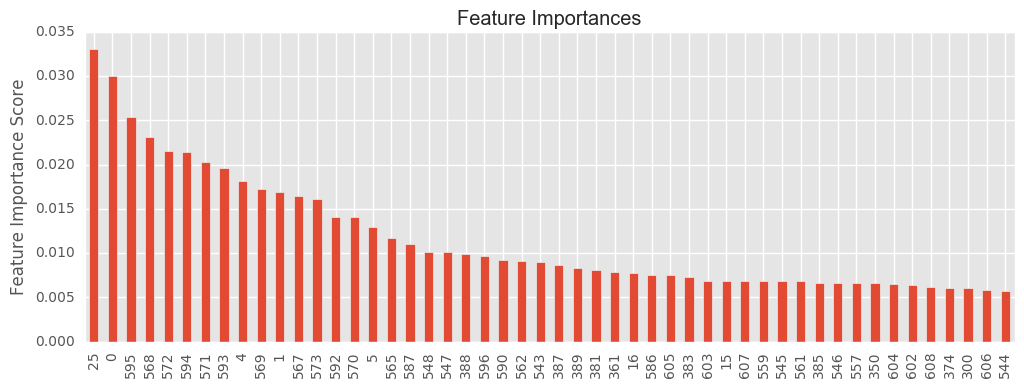

In [228]:
import pandas as pd
import numpy as np
#import graphviz
import xgboost as xgb
import time
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.cross_validation import train_test_split
from collections import Counter
from pandas_ml import ConfusionMatrix

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
#fixing random state
random_state=1

X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv('y_train.csv',header=None)
y_test = pd.read_csv('y_test.csv',header=None)

xgb_final = XGBClassifier(
 learning_rate = 0.1,
 n_estimators = 111,
 max_depth = 5,
 min_child_weight = 5,
 gamma = 0.3,
 subsample = 0.8,
 colsample_bytree= 0.6,
 reg_alpha= 1,
 objective= 'multi:softprob',
 n_job = 4,
 scale_pos_weight = 1,
 seed = 1)

xgb_final.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='mlogloss', early_stopping_rounds=15, verbose=False)

y_pred = xgb_final.predict(X_test)

feat_imp = pd.Series(xgb_final.feature_importances_).sort_values(ascending=False)[:50]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> The most important variable is dac_tfa_secs which describes timespans between account created date and timestamp_first_active date. The second important variable is age. The third important variable is about sections elapsed. The fourth and fifth are about action types. </p>

<h3> <span style="color:#fd5c63;line-height: 0px;"> &#10063; Model Ensemble</span> </h3>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.Unlike a statistical ensemble in statistical mechanics, which is usually infinite, a machine learning ensemble refers only to a concrete finite set of alternative models, but typically allows for much more flexible structure to exist among those alternatives.</p>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> We use majority voting to determine final result. We set weight according to accuracy. For each model i with accuracy $a_i$, the weight $w_i=round(\frac{a_i}{\sum a_i}*100)$. Accoding to out three accuracy, we set the weight as 33,34,33 for randomforest, svm and xgboost.</p>

<h3> <span style="color:#fd5c63;line-height: 0px;"> &#10063; Model Comparision</span> </h3>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> ROC </p>

In [168]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve,auc,average_precision_score
y_pred_all = pd.read_csv("y_pred_all.csv")
y_predprob_svm = pd.read_csv("y_predprob_svm.csv",header=None)
y_predprob_rf = pd.read_csv("y_predprob_rf.csv")
y_predprob_rf = y_predprob_rf.iloc[:,1:]
y_predprob_xgb = pd.read_csv("y_predprob_xgboost.csv")
y_predprob_ems = pd.read_csv("y_predprob_ems.csv")
y_predprob_ems = y_predprob_ems.iloc[:,1:]
y_test = pd.read_csv('y_test.csv',header=None)
y_test = y_test.iloc[:,0]

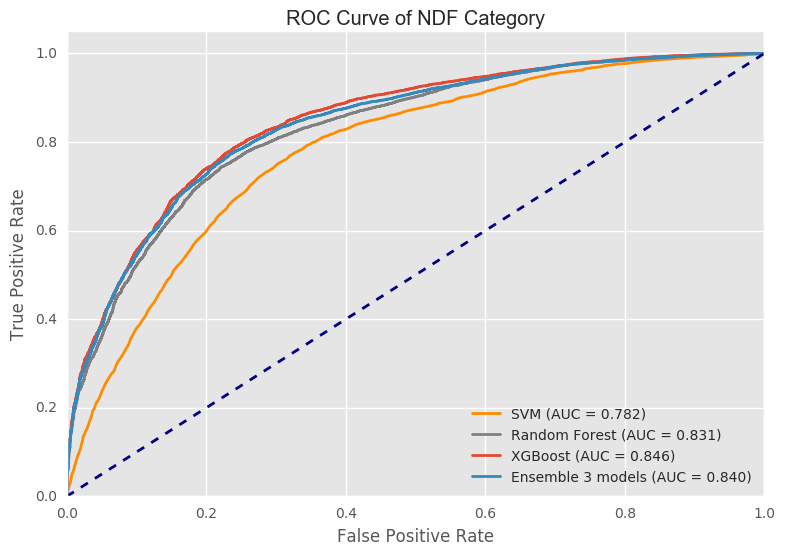

In [208]:
#ROC and PR Curve of NDF Category
y_7_test = np.ravel(y_test) == 7
fpr, tpr,_ = roc_curve(y_7_test, y_predprob_svm.as_matrix()[:,7])

fpr1, tpr1,_ = roc_curve(y_7_test, y_predprob_rf.as_matrix()[:,7])

fpr2, tpr2,_ = roc_curve(y_7_test, y_predprob_xgb.as_matrix()[:,7])

fpr3, tpr3,_ = roc_curve(y_7_test, y_predprob_ems.as_matrix()[:,7])

#ROC Curve
roc_auc = auc(fpr,tpr)
roc_auc1 = auc(fpr1,tpr1)
roc_auc2 = auc(fpr2,tpr2)
roc_auc3 = auc(fpr3,tpr3)

width = 9
height = 6
plt.figure(figsize = (width, height))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='SVM (AUC = %0.3f)' % roc_auc)
plt.plot(fpr1, tpr1,color = 'grey',lw=lw, label='Random Forest (AUC = %0.3f)' % roc_auc1)
plt.plot(fpr2, tpr2, lw=lw, label='XGBoost (AUC = %0.3f)' % roc_auc2)
plt.plot(fpr3, tpr3, lw=lw, label='Ensemble 3 models (AUC = %0.3f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of NDF Category')
plt.legend(loc="lower right")
plt.show()

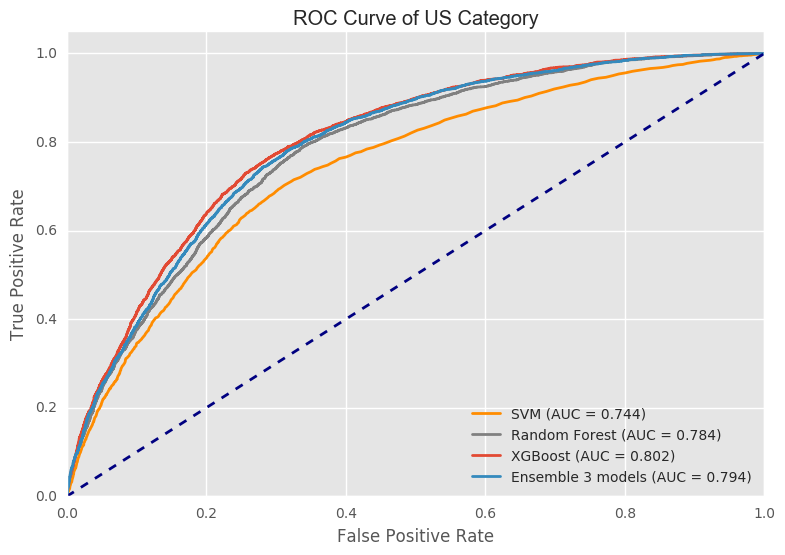

In [210]:
#ROC and PR Curve of US Category
y_10_test = np.ravel(y_test) == 10
fpr, tpr,_ = roc_curve(y_10_test, y_predprob_svm.as_matrix()[:,10])
precision, recall, _ = precision_recall_curve(y_10_test,y_predprob_svm.as_matrix()[:,10])

fpr1, tpr1,_ = roc_curve(y_10_test, y_predprob_rf.as_matrix()[:,10])
precision1, recall1, _ = precision_recall_curve(y_10_test,y_predprob_rf.as_matrix()[:,10])

fpr2, tpr2,_ = roc_curve(y_10_test, y_predprob_xgb.as_matrix()[:,10])
precision2, recall2, _ = precision_recall_curve(y_10_test,y_predprob_xgb.as_matrix()[:,10])

fpr3, tpr3,_ = roc_curve(y_10_test, y_predprob_ems.as_matrix()[:,10])
precision3, recall3, _ = precision_recall_curve(y_10_test,y_predprob_ems.as_matrix()[:,10])

#ROC Curve
roc_auc = auc(fpr,tpr)
roc_auc1 = auc(fpr1,tpr1)
roc_auc2 = auc(fpr2,tpr2)
roc_auc3 = auc(fpr3,tpr3)

width = 9
height = 6
plt.figure(figsize = (width, height))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='SVM (AUC = %0.3f)' % roc_auc)
plt.plot(fpr1, tpr1,color = 'grey',lw=lw, label='Random Forest (AUC = %0.3f)' % roc_auc1)
plt.plot(fpr2, tpr2, lw=lw, label='XGBoost (AUC = %0.3f)' % roc_auc2)
plt.plot(fpr3, tpr3, lw=lw, label='Ensemble 3 models (AUC = %0.3f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of US Category')
plt.legend(loc="lower right")
plt.show()

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> Area under the curve (AUC) value describes the overall performace of a classifier. Based on the area under the curve values, these 3 models plus the ensembled model classify the destination country NDF better than they do on US. XGBoost performs slightly better than the ensembled model. Random Forest performs almost as good as the ensembled method. The reason of this result is because in the ensemble process. We use a heavier weight on xgboost. This dataset is imbalanced. The major country is US and NDF. It is easier to predict the county as US and NDF. It is difficult to classify other countries. Compared to random forest and svm, xgboost does a better job in predicting this minority. Therefore, in the ensemble process, xgboost's vote is more importance. That is the reason why ensemble model is close to xgboost.</p>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> PR </p>

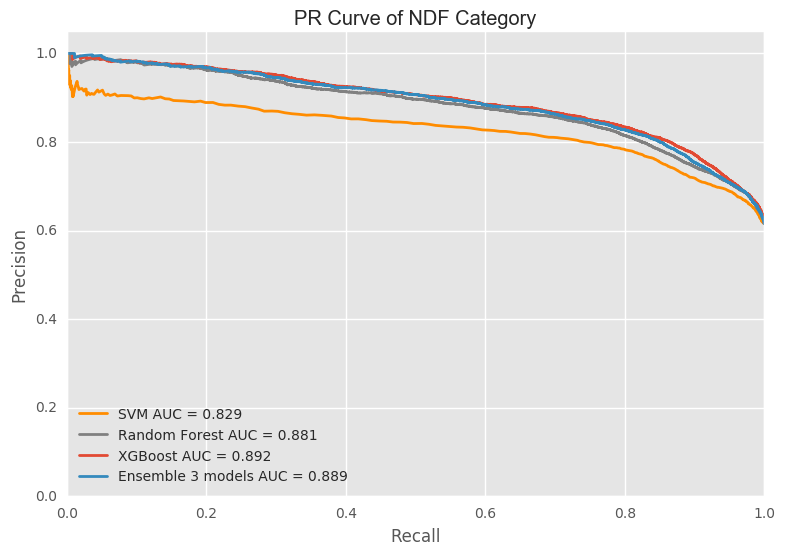

In [211]:
#PR Curve
#PR Curve of NDF Category
y_7_test = np.ravel(y_test) == 7
precision, recall, _ = precision_recall_curve(y_7_test,y_predprob_svm.as_matrix()[:,7])
average_precision = average_precision_score(y_7_test, y_predprob_svm.as_matrix()[:,7])

precision1, recall1, _ = precision_recall_curve(y_7_test,y_predprob_rf.as_matrix()[:,7])
average_precision1 = average_precision_score(y_7_test,y_predprob_rf.as_matrix()[:,7])

precision2, recall2, _ = precision_recall_curve(y_7_test,y_predprob_xgb.as_matrix()[:,7])
average_precision2 = average_precision_score(y_7_test, y_predprob_xgb.as_matrix()[:,7])

precision3, recall3, _ = precision_recall_curve(y_7_test,y_predprob_ems.as_matrix()[:,7])
average_precision3 = average_precision_score(y_7_test, y_predprob_ems.as_matrix()[:,7])

width = 9
height = 6
plt.figure(figsize = (width, height))
lw = 2
plt.plot(recall, precision, color='darkorange', lw=lw, label='SVM AUC = %0.3f' %average_precision)
plt.plot(recall1, precision1, color = 'grey', lw=lw, label='Random Forest AUC = %0.3f'%average_precision1)
plt.plot(recall2, precision2, lw=lw, label='XGBoost AUC = %0.3f'%average_precision2)
plt.plot(recall3, precision3, lw=lw, label='Ensemble 3 models AUC = %0.3f'%average_precision3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve of NDF Category')
plt.legend(loc="lower left")
plt.show()

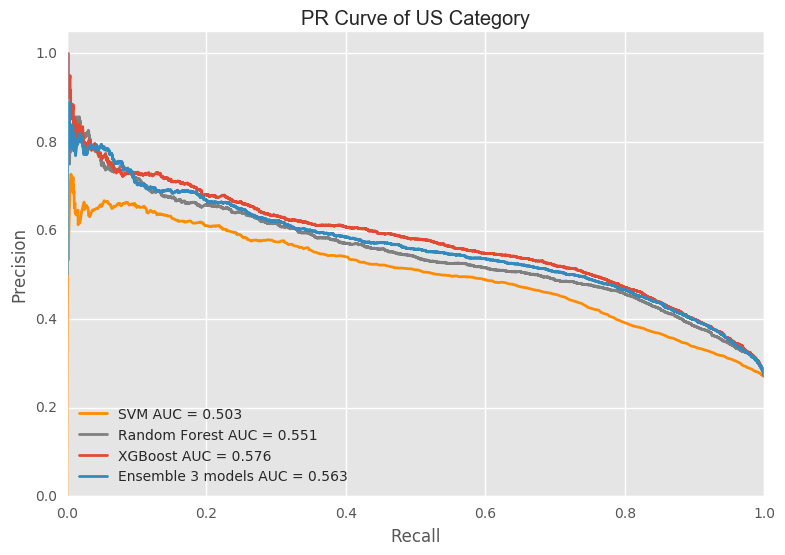

In [212]:
#PR Curve
#PR Curve of US Category
y_10_test = np.ravel(y_test) == 10
precision, recall, _ = precision_recall_curve(y_10_test,y_predprob_svm.as_matrix()[:,10])
average_precision = average_precision_score(y_10_test, y_predprob_svm.as_matrix()[:,10])

precision1, recall1, _ = precision_recall_curve(y_10_test,y_predprob_rf.as_matrix()[:,10])
average_precision1 = average_precision_score(y_10_test,y_predprob_rf.as_matrix()[:,10])

precision2, recall2, _ = precision_recall_curve(y_10_test,y_predprob_xgb.as_matrix()[:,10])
average_precision2 = average_precision_score(y_10_test, y_predprob_xgb.as_matrix()[:,10])

precision3, recall3, _ = precision_recall_curve(y_10_test,y_predprob_ems.as_matrix()[:,10])
average_precision3 = average_precision_score(y_10_test, y_predprob_ems.as_matrix()[:,10])

width = 9
height = 6
plt.figure(figsize = (width, height))
lw = 2
plt.plot(recall, precision, color='darkorange', lw=lw, label='SVM AUC = %0.3f' %average_precision)
plt.plot(recall1, precision1, color = 'grey', lw=lw, label='Random Forest AUC = %0.3f'%average_precision1)
plt.plot(recall2, precision2, lw=lw, label='XGBoost AUC = %0.3f'%average_precision2)
plt.plot(recall3, precision3, lw=lw, label='Ensemble 3 models AUC = %0.3f'%average_precision3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve of US Category')
plt.legend(loc="lower left")
plt.show()

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> Presion is the (true positive)/(true positive + false postive). And recall is (true positive)/(true positve + false negative). The precision and recall of NDF category is much better than US category. Overall, the result is similar as ROC curve. XGBoost does better than the other 3 models. </p>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> Confusion Matrix </p>

Confusion matrix, without normalization


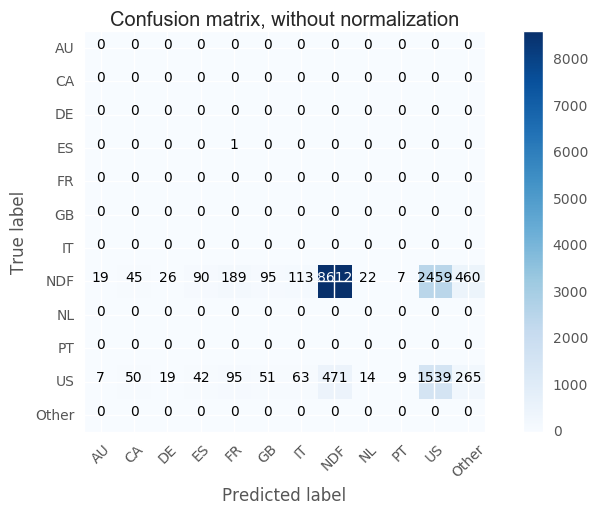

In [225]:
from pandas_ml import ConfusionMatrix
import itertools

y_pred_ems = pd.read_csv("ensem_label.csv")
y_pred_ems = y_pred_ems.iloc[:,1]

class_names = ['AU','CA','DE','ES','FR','GB','IT','NDF','NL','PT','US','Other']
# Plot non-normalized confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

width = 8
height = 5
plt.figure(figsize = (width, height))
plot_confusion_matrix(confusion_matrix(y_pred_ems,y_test), classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

<a href = '#contents'><span style = "color:#6f6f6f;font-size:14px;color:#6f6f6f"> Return to contents &#8682; </span> </a>

<a id='Conclusion'></a>

<h1> <span style="color:#fd5c63;line-height: 0px;">&#9992; Conclusion </span> </h1>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> For the extreme unbalanced data, it is hard for all these models to predict labels for the classes that have low frequencies since the predominat predictions are NDP and USA. Because all these three models have similiar predictions and accuracy, the model ensembling makes no improvement. Precisely, because of the major predictions are NDF and USA, the output of model ensembling will still give these two labels. And what worse, the result of svm and random forest do not predict labels in country except USA and NDF. For the method of majority voting, the result is determinded by  the svm and random forest which will even reduce the proportion of correctly predict label of other countries will reduce. </p>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f"> Comparing these models, we can also find that random forest is the fastest one since it will parralling automatically since the trees are independent. Xgboost gives the best accuracy and it successfully predict some labels of labels with lower counts since it will consider the error  to adjust the weights of each feature in each step.  </p>

<a href = '#contents'><span style = "color:#6f6f6f;font-size:14px;color:#6f6f6f"> Return to contents &#8682; </span> </a>

<a id='Reference'></a>

<h1> <span style="color:#fd5c63;line-height: 0px;">&#9992; Reference </span> </h1>

<p style="font-size:18px; line-height:25px; font-family:Arial;color:#6f6f6f">
[1] Kaggle Competition: Airbnb New User Bookings:https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings  
[2] Feature Engineering of the 3rd Place Competitor:  https://www.kaggle.com/svpons/feature-engineering  
[3] User Data Exploration:  https://www.kaggle.com/davidgasquez/user-data-exploration  
[4] 2nd Place Competitor Github Repository: https://github.com/Keiku/kaggle-airbnb-recruiting-new-user-bookings  
[5] Airbnb -Predicting New Users Bookings, Jaeyoon Jung, http://rstudio-pubs-static.s3.amazonaws.com/197502_9bf4cf621a824e3093abc48d5a04e6de.html  
[6] https://github.com/davidgasquez/kaggle-airbnb  
[7] The Prediction of Booking Destination On Airbnb Dataset, Ke Zhang, Zhengren Pan, Sichao Shi, https://cseweb.ucsd.edu/~jmcauley/cse190/reports/fa15/006.pdf  
[8] Airbnb New User Bookings: http://216.230.228.88:3838/bootcamp005_project/Project5-Capstone/Rob_Zi_Yannick_Michael--Airbnb/Presentation/Airbnb%20New%20User%20Bookings.pdf  
[9] Data science: a kaggle walkthrough – understanding the data, http://brettromero.com/wordpress/data-science-a-kaggle-walkthrough-understanding-the-data/  
[10] https://www.kaggle.com/svpons/script-0-8655/code  
[11] Complete Guide to Parameter Tuning in Gradient Boosting (GBM) in Python, https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
</p>

<a href = '#contents'><span style = "color:#6f6f6f;font-size:14px;color:#6f6f6f"> Return to contents &#8682; </span> </a>